<a href="https://colab.research.google.com/github/taliacanosa/Challenge-Alurastore/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Importación de datos
---



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación:
---



### 1.1 Facturación total por tienda

In [2]:
def facturacion(f):
  totalIngresos = f["Precio"].sum()
  return totalIngresos

titulo = "FACTURACIÓN TOTAL POR TIENDA"
print(titulo)
print("-" * len(titulo)) #para subrayar el título con el largo que tenga

print(f"Tienda nº 1: total facturado: $ {facturacion(tienda):,.2f}") #.2f para facilitar la lectura de los números
print(f"Tienda nº 2: total facturado: $ {facturacion(tienda2):,.2f}")
print(f"Tienda nº 3: total facturado: $ {facturacion(tienda3):,.2f}")
print(f"Tienda nº 4: total facturado: $ {facturacion(tienda4):,.2f}")

FACTURACIÓN TOTAL POR TIENDA
----------------------------
Tienda nº 1: total facturado: $ 1,150,880,400.00
Tienda nº 2: total facturado: $ 1,116,343,500.00
Tienda nº 3: total facturado: $ 1,098,019,600.00
Tienda nº 4: total facturado: $ 1,038,375,700.00


### 1.2 Gráfico de los resultados

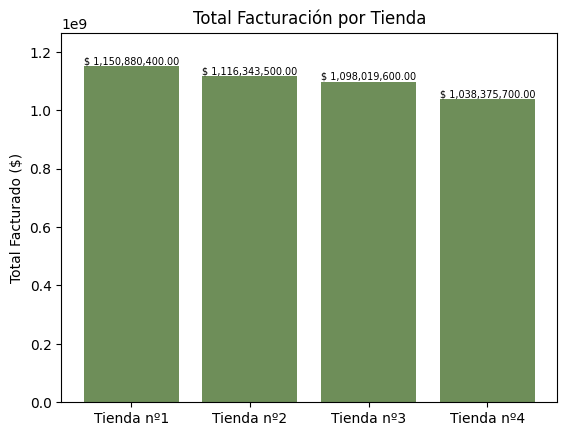

In [5]:
import matplotlib.pyplot as plt


tiendas = ["Tienda nº1", "Tienda nº2", "Tienda nº3", "Tienda nº4" ]

totalFacturacion = [
    facturacion(tienda),
    facturacion(tienda2),
    facturacion(tienda3),
    facturacion(tienda4)
]

#colores = ["#0B8494", "#EC8305", "#6E8E59", "#F3C623"]
#para usar un color diferente por barra. Colocar color=colores

plt.bar(x = tiendas, height = totalFacturacion, color="#6E8E59")
plt.ylabel('Total Facturado ($)')
plt.title('Total Facturación por Tienda')
plt.margins(y=0.1)

# Agregar los valores sobre las barras
for i, valor in enumerate(totalFacturacion):
    plt.text(i, valor + 0.5, f"$ {valor:,.2f}", ha="center", va="bottom", fontsize=7)


plt.show()

# 2. Análisis por categorías
---



### 2.1 Listado de categorías

In [6]:
def nombreCategorias(nc):
    categorias = []
    for categoria in nc["Categoría del Producto"]:
        if categoria not in categorias:
            categorias.append(categoria)

    return sorted(categorias)


titulo = "CATEGORÍAS DE TODAS LAS TIENDAS"
print(titulo)
print("-" * len(titulo))

print(f"Tienda nº 1: {nombreCategorias(tienda)}")
print(f"Tienda nº 2: {nombreCategorias(tienda2)}")
print(f"Tienda nº 3: {nombreCategorias(tienda3)}")
print(f"Tienda nº 4: {nombreCategorias(tienda4)}")

CATEGORÍAS DE TODAS LAS TIENDAS
-------------------------------
Tienda nº 1: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda nº 2: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda nº 3: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']
Tienda nº 4: ['Artículos para el hogar', 'Deportes y diversión', 'Electrodomésticos', 'Electrónicos', 'Instrumentos musicales', 'Juguetes', 'Libros', 'Muebles']


### 2.2 Ventas totales por categoría y por tienda

In [7]:
def totalCategoria(tc):
    conteo = tc["Categoría del Producto"].value_counts().to_dict()
    return dict(sorted(conteo.items()))


titulo = "VENTAS TOTALES POR CATEGORÍA Y POR TIENDA"
print(titulo)
print("-" * len(titulo))

print(f"Tienda nº1: {totalCategoria(tienda)}")
print(f"Tienda nº2: {totalCategoria(tienda2)}")
print(f"Tienda nº3: {totalCategoria(tienda3)}")
print(f"Tienda nº4: {totalCategoria(tienda4)}")


VENTAS TOTALES POR CATEGORÍA Y POR TIENDA
-----------------------------------------
Tienda nº1: {'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Electrodomésticos': 312, 'Electrónicos': 448, 'Instrumentos musicales': 182, 'Juguetes': 324, 'Libros': 173, 'Muebles': 465}
Tienda nº2: {'Artículos para el hogar': 181, 'Deportes y diversión': 275, 'Electrodomésticos': 305, 'Electrónicos': 422, 'Instrumentos musicales': 224, 'Juguetes': 313, 'Libros': 197, 'Muebles': 442}
Tienda nº3: {'Artículos para el hogar': 177, 'Deportes y diversión': 277, 'Electrodomésticos': 278, 'Electrónicos': 451, 'Instrumentos musicales': 177, 'Juguetes': 315, 'Libros': 185, 'Muebles': 499}
Tienda nº4: {'Artículos para el hogar': 201, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Libros': 187, 'Muebles': 480}


### 2.2 Categorías con más ventas por tienda

In [8]:
def categoriaMasVendida(tc):
    conteo = totalCategoria(tc)
    if not conteo:
        return None


    categoria_max = max(conteo, key=conteo.get)
    return categoria_max, conteo[categoria_max]


cat1, cant1 = categoriaMasVendida(tienda)
cat2, cant2 = categoriaMasVendida(tienda2)
cat3, cant3 = categoriaMasVendida(tienda3)
cat4, cant4 = categoriaMasVendida(tienda4)



titulo = "CATEGORÍA CON MÁS VENTAS"
print(titulo)
print("-" * len(titulo))

print(f"Tienda nº1: {cat1} ({cant1} ventas)")
print(f"Tienda nº2: {cat2} ({cant2} ventas)")
print(f"Tienda nº3: {cat3} ({cant3} ventas)")
print(f"Tienda nº4: {cat4} ({cant4} ventas)")


CATEGORÍA CON MÁS VENTAS
------------------------
Tienda nº1: Muebles (465 ventas)
Tienda nº2: Muebles (442 ventas)
Tienda nº3: Muebles (499 ventas)
Tienda nº4: Muebles (480 ventas)


### 2.3 Categorías con menos ventas por tienda

In [9]:
def categoriaMenosVendida(tc):
    conteo = totalCategoria(tc)
    if not conteo:
        return None

    categoria_min = min(conteo, key=conteo.get)
    return categoria_min, conteo[categoria_min]

cat1, cant1 = categoriaMenosVendida(tienda)
cat2, cant2 = categoriaMenosVendida(tienda2)
cat3, cant3 = categoriaMenosVendida(tienda3)
cat4, cant4 = categoriaMenosVendida(tienda4)


titulo = "CATEGORÍAS CON MENOS VENTAS"
print(titulo)
print("-" * len(titulo))

print(f"Tienda nº1: {cat1} ({cant1} ventas)")
print(f"Tienda nº2: {cat2} ({cant2} ventas)")
print(f"Tienda nº3: {cat3} ({cant3} ventas)")
print(f"Tienda nº4: {cat4} ({cant4} ventas)")

CATEGORÍAS CON MENOS VENTAS
---------------------------
Tienda nº1: Artículos para el hogar (171 ventas)
Tienda nº2: Artículos para el hogar (181 ventas)
Tienda nº3: Artículos para el hogar (177 ventas)
Tienda nº4: Instrumentos musicales (170 ventas)


### 2.4 Garáfico de los resultados

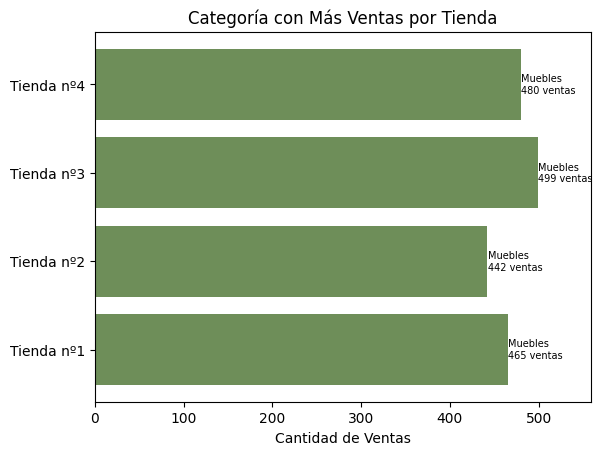

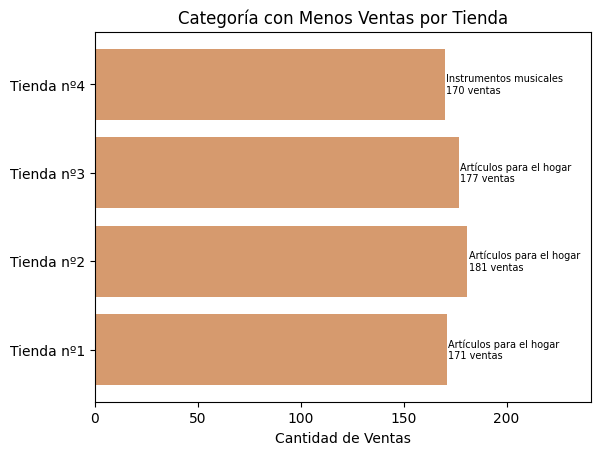

In [23]:
# GRÁFICO PARA LAS CATEGORÍAS CON MAS VENTAS

cat1, cant1 = categoriaMasVendida(tienda)
cat2, cant2 = categoriaMasVendida(tienda2)
cat3, cant3 = categoriaMasVendida(tienda3)
cat4, cant4 = categoriaMasVendida(tienda4)

categorias = [cat1, cat2, cat3, cat4]
ventas = [cant1, cant2, cant3, cant4]
tiendas = ['Tienda nº1', 'Tienda nº2', 'Tienda nº3', 'Tienda nº4']

# Barras horizontales para el gráfico
plt.barh(tiendas, ventas, color="#6E8E59")

plt.xlim(0, max(ventas) + 60) # Ampliar el recuadro hacia la derecha

# Etiquetas y título
plt.xlabel('Cantidad de Ventas')
plt.title('Categoría con Más Ventas por Tienda')

# Agregar los valores sobre las barras
for i, v in enumerate(ventas):
    categoria = categorias[i]  # Obtener la categoría correspondiente
    plt.text(v + 0.5, i, f'{categoria} \n{v} ventas', va='center', fontsize=7)


plt.show()

# GRÁFICO PARA LAS CATEGORÍAS CON MENOS VENTAS

# Cálculo de la categoría con menos ventas por tienda
cat1_min, cant1_min = categoriaMenosVendida(tienda)
cat2_min, cant2_min = categoriaMenosVendida(tienda2)
cat3_min, cant3_min = categoriaMenosVendida(tienda3)
cat4_min, cant4_min = categoriaMenosVendida(tienda4)

# Listas con las categorías y las ventas
categorias_min = [cat1_min, cat2_min, cat3_min, cat4_min]
ventas_min = [cant1_min, cant2_min, cant3_min, cant4_min]
tiendas_min = ['Tienda nº1', 'Tienda nº2', 'Tienda nº3', 'Tienda nº4']


plt.barh(tiendas_min, ventas_min, color="#D69A6E")
plt.xlim(0, max(ventas_min) + 60)

plt.xlabel('Cantidad de Ventas')
plt.title('Categoría con Menos Ventas por Tienda')

# Agregar los valores sobre las barras
for i, v in enumerate(ventas_min):
    categoria = categorias_min[i]
    plt.text(v + 0.5, i, f'{categoria} \n{v} ventas', va='center', fontsize=7)

plt.show()

### 2.5 Ventas totales de las categorías de todas las tiendas

In [12]:
tiendas_concatenadas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

def totalCategoria(tc):
    conteo = tc["Categoría del Producto"].value_counts().to_dict()
    return dict(sorted(conteo.items()))


# Título
titulo = "VENTAS TOTALES DE CADA TEGORIA CATEGORÍA (todas las tiendas)"
print(titulo)
print("-" * len(titulo))


# Mostrar los totales por categoría de todas las tiendas concatenadas

resultado = totalCategoria(tiendas_concatenadas)
for categoria, total in resultado.items():
    print(f"{categoria}: {total}")


VENTAS TOTALES DE CADA TEGORIA CATEGORÍA (todas las tiendas)
------------------------------------------------------------
Artículos para el hogar: 730
Deportes y diversión: 1113
Electrodomésticos: 1149
Electrónicos: 1772
Instrumentos musicales: 753
Juguetes: 1290
Libros: 742
Muebles: 1886


### 2.6 Gráfico de los resultados

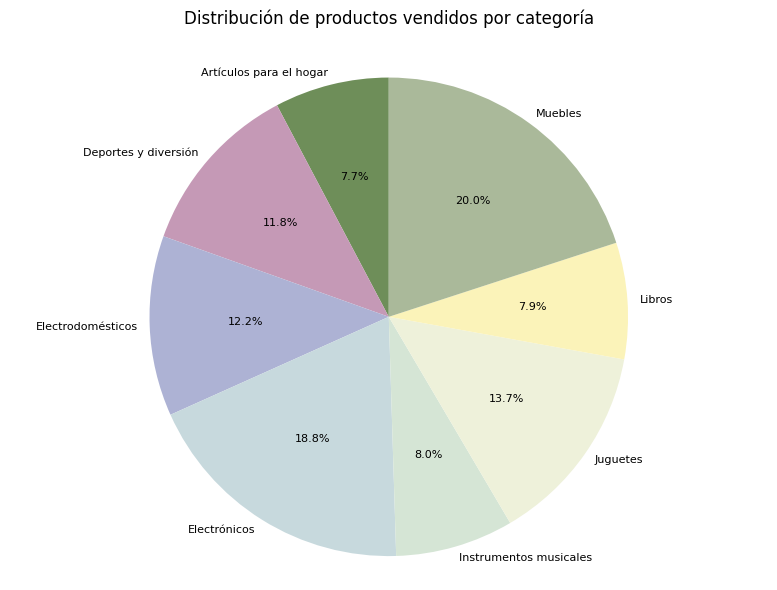

In [13]:
plt.figure(figsize=(8, 6))
colores = ["#6E8E59", "#C599B6", "#ADB2D4", "#C7D9DD", "#D5E5D5", "#EEF1DA", "#FBF3B9","#AAB99A" ]
plt.pie(
    resultado.values(),
    labels=resultado.keys(),
    colors=colores,
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.05,  # Acerca las etiquetas
    textprops={'fontsize': 8}
)
plt.title("Distribución de productos vendidos por categoría\n")
plt.axis('equal')  # Asegura que el gráfico sea circular
plt.tight_layout()
plt.show()

# 3. Análisis por productos
---



### 3.1 Ventas por producto

In [14]:
conteo_productos = tiendas_concatenadas['Producto'].value_counts()

print("TOTAL DE PRODUCTOS VENDIDOS POR NOMBRE")
print("-" * 40)

for producto, cantidad in conteo_productos.items():
    print(f"{producto}: {cantidad}")

TOTAL DE PRODUCTOS VENDIDOS POR NOMBRE
----------------------------------------
Mesa de noche: 210
Carrito de control remoto: 206
Microondas: 206
Batería: 203
Cama king: 201
Secadora de ropa: 200
Modelado predictivo: 200
Set de ollas: 200
Cama box: 199
Bloques de construcción: 199
Iphone 15: 198
Armario: 197
Pandereta: 197
Balón de baloncesto: 197
Bicicleta: 196
Iniciando en programación: 195
Smart TV: 192
Refrigerador: 191
Lavavajillas: 189
Cubertería: 189
Guitarra acústica: 188
Impresora: 188
Kit de bancas: 188
Vaso térmico: 187
Estufa: 187
TV LED UHD 4K: 187
Cuerda para saltar: 186
Mesa de comedor: 185
Balón de voleibol: 184
Sofá reclinable: 182
Silla de oficina: 181
Dashboards con Power BI: 181
Cubo mágico 8x8: 180
Ajedrez de madera: 180
Tablet ABXY: 179
Lavadora de ropa: 176
Muñeca bebé: 175
Mesa de centro: 175
Dinosaurio Rex: 175
Juego de mesa: 175
Auriculares: 174
Olla de presión: 172
Smartwatch: 172
Set de vasos: 169
Sillón: 168
Asistente virtual: 167
Ciencia de datos con Pytho

### 3.2 Productos más y menos vendidos

In [15]:
producto_mas_vendido = conteo_productos.idxmax()
cantidad_mas_vendida = conteo_productos.max()

producto_menos_vendido = conteo_productos.idxmin()
cantidad_menos_vendida = conteo_productos.min()

# Título
titulo = "PRODUCTOS MÁS Y MENOS VENDIDOS (todas las tiendas)"
print(titulo)
print("-" * len(titulo))

print(f"Producto más vendido: {producto_mas_vendido} con {cantidad_mas_vendida} ventas")
print(f"Producto menos vendido: {producto_menos_vendido} con {cantidad_menos_vendida} ventas")

PRODUCTOS MÁS Y MENOS VENDIDOS (todas las tiendas)
--------------------------------------------------
Producto más vendido: Mesa de noche con 210 ventas
Producto menos vendido: Celular ABXY con 157 ventas


### 3.4 Grafico de los resultados

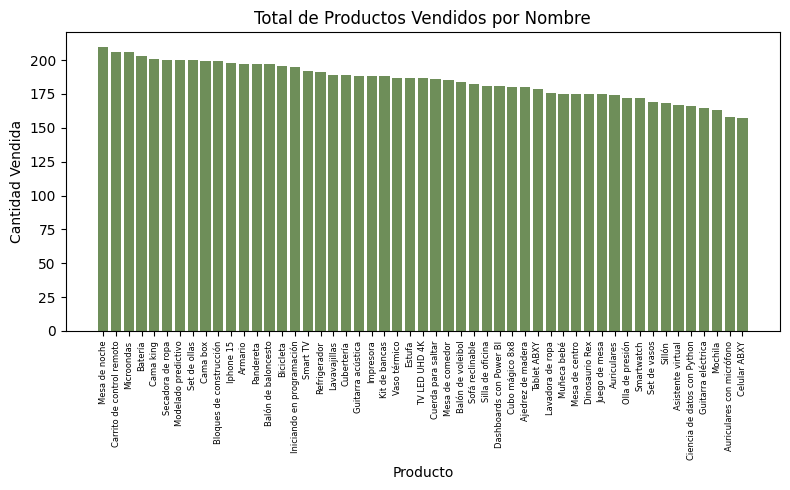

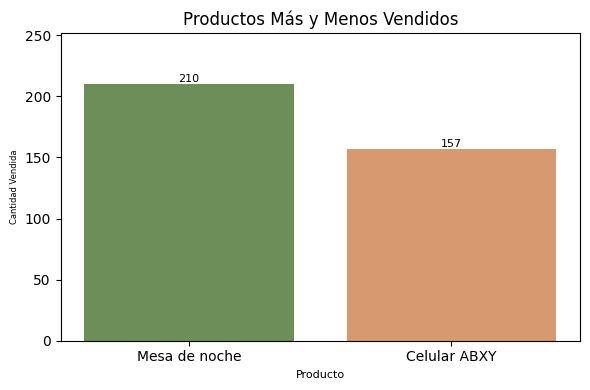

In [18]:
# GRÁFICO DEL TOTAL DE VENTAS DE TODOS LOS PRODUCTOS

plt.figure(figsize=(8, 5))
plt.bar(conteo_productos.index, conteo_productos.values, color="#6E8E59")

# Títulos y etiquetas
plt.title("Total de Productos Vendidos por Nombre")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=90, fontsize=6)  # Rotar las etiquetas en el eje x
plt.tight_layout()  # Ajustar el layout para que no se corten las etiquetas

plt.show()




# GRÁFICO DE LOS PRODUCTOS MAS Y MENOS VENDIDOS

productos = [producto_mas_vendido, producto_menos_vendido]
ventas = [cantidad_mas_vendida, cantidad_menos_vendida]

plt.figure(figsize=(6, 4))
bars = plt.bar(productos, ventas, color=["#6E8E59", "#D69A6E"])

# Títulos y etiquetas
plt.title("Productos Más y Menos Vendidos", fontsize=12)
plt.xlabel("Producto", fontsize=8)
plt.ylabel("Cantidad Vendida", fontsize=6)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1,
             str(int(yval)), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.margins(y=0.2)

plt.show()

# 4. Calificaciones de las tiendas
---



### 4.1. Análisis de calificaciones

In [ ]:
def sumaCalificaciones(pct):
    return pct["Calificación"].sum()

def cantidadCalificaciones(pct):
    return pct["Calificación"].count()

def promedioCalificaciones(pct):
    suma = sumaCalificaciones(pct)
    cantidad = cantidadCalificaciones(pct)
    return suma / cantidad

titulo = "CALIFICACIÓN PROMEDIO DE LAS TIENDAS"
print(titulo)
print("-" * len(titulo))

print(f"Tienda nº 1 - Calificación promedio: {promedioCalificaciones(tienda):.2f} - "
      f"Cantidad de evaluaciones: {cantidadCalificaciones(tienda):,} -"
      f" Puntos obtenidos: {sumaCalificaciones(tienda)}")

print(f"Tienda nº 2 - Calificación promedio: {promedioCalificaciones(tienda2):.2f} - "
      f"Cantidad de evaluaciones: {cantidadCalificaciones(tienda2):,} -"
      f" Puntos obtenidos: {sumaCalificaciones(tienda2)}")

print(f"Tienda nº 3 - Calificación promedio: {promedioCalificaciones(tienda3):.2f} - "
      f"Cantidad de evaluaciones: {cantidadCalificaciones(tienda3):,} -"
      f" Puntos obtenidos: {sumaCalificaciones(tienda3)}")

print(f"Tienda nº 4 - Calificación promedio: {promedioCalificaciones(tienda4):.2f} - "
      f"Cantidad de evaluaciones: {cantidadCalificaciones(tienda4):,} -"
      f" Puntos obtenidos: {sumaCalificaciones(tienda4)}")

CALIFICACIÓN PROMEDIO DE LAS TIENDAS
------------------------------------
Tienda nº 1 - Calificación promedio: 3.98 - Cantidad de evaluaciones: 2,359 - Puntos obtenidos: 9381
Tienda nº 2 - Calificación promedio: 4.04 - Cantidad de evaluaciones: 2,359 - Puntos obtenidos: 9524
Tienda nº 3 - Calificación promedio: 4.05 - Cantidad de evaluaciones: 2,359 - Puntos obtenidos: 9550
Tienda nº 4 - Calificación promedio: 4.00 - Cantidad de evaluaciones: 2,358 - Puntos obtenidos: 9422


### 4.2 Gráfico de los resultados obtenidos

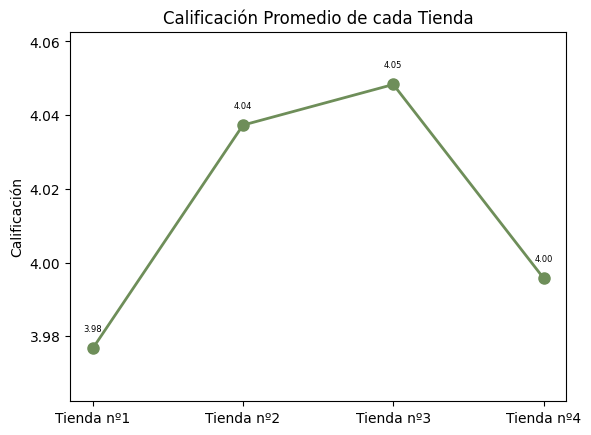

In [ ]:
tiendas = ["Tienda nº1", "Tienda nº2", "Tienda nº3", "Tienda nº4"]

CalificacionPromedioTienda = [
    promedioCalificaciones(tienda),
    promedioCalificaciones(tienda2),
    promedioCalificaciones(tienda3),
    promedioCalificaciones(tienda4)
]

plt.plot(tiendas, CalificacionPromedioTienda, marker='o', color="#6E8E59", linestyle='-', linewidth=2, markersize=8)
plt.ylabel('Calificación')
plt.title('Calificación Promedio de cada Tienda')


for i, valor in enumerate(CalificacionPromedioTienda):
    plt.text(i + 0.06, valor + 0.004, f'{valor:.2f}', ha='right', va='bottom', fontsize=6)

plt.margins(y=0.2)
plt.show()


# 5. Envío promedio por tienda

### 5.1 Análisis de los costos promedios de envio por tienda

In [21]:
def costoEnvios(ce):
    return ce["Costo de envío"].sum()

def cantidadEnvios(te):
    return te["Costo de envío"].count()

def costoPromedioEnvios(pe):
    total = costoEnvios(pe)
    cantidad = cantidadEnvios(pe)
    return total / cantidad


titulo = "COSTO PROMEDIO DE ENVIOS"
print(titulo)
print("-" * len(titulo))


print(f"Tienda nº 1 - Costo promedio de envío: ${costoPromedioEnvios(tienda):,.2f} - "
      f"Costo total de envíos: ${costoEnvios(tienda):,.2f} - "
      f"Cantidad de envíos: {cantidadEnvios(tienda)}")

print(f"Tienda nº 2 - Costo promedio de envío: ${costoPromedioEnvios(tienda2):,.2f} - "
      f"Costo total de envíos: ${costoEnvios(tienda2):,.2f} - "
      f"Cantidad de envíos: {cantidadEnvios(tienda2)}")

print(f"Tienda nº 3 - Costo promedio de envío: ${costoPromedioEnvios(tienda3):,.2f} - "
      f"Costo total de envíos: ${costoEnvios(tienda3):,.2f} - "
      f"Cantidad de envíos: {cantidadEnvios(tienda3)}")

print(f"Tienda nº 4 - Costo promedio de envío: ${costoPromedioEnvios(tienda4):,.2f} - "
      f"Costo total de envíos: ${costoEnvios(tienda4):,.2f} - "
      f"Cantidad de envíos: {cantidadEnvios(tienda4)}")

COSTO PROMEDIO DE ENVIOS
------------------------
Tienda nº 1 - Costo promedio de envío: $26,018.61 - Costo total de envíos: $61,377,900.00 - Cantidad de envíos: 2359
Tienda nº 2 - Costo promedio de envío: $25,216.24 - Costo total de envíos: $59,485,100.00 - Cantidad de envíos: 2359
Tienda nº 3 - Costo promedio de envío: $24,805.68 - Costo total de envíos: $58,516,600.00 - Cantidad de envíos: 2359
Tienda nº 4 - Costo promedio de envío: $23,459.46 - Costo total de envíos: $55,317,400.00 - Cantidad de envíos: 2358


### 5.2 Gráfico de los resultados

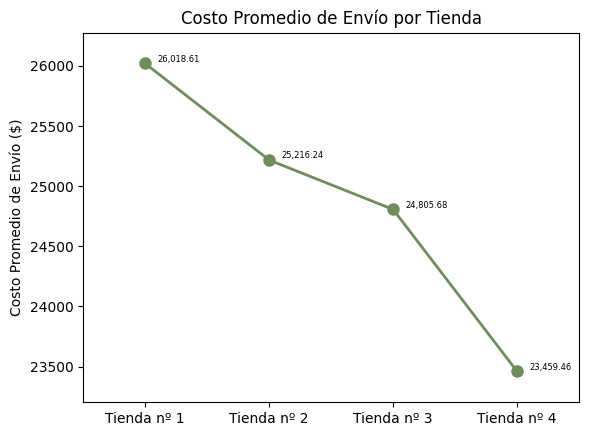

In [22]:
tiendas = ["Tienda nº 1", "Tienda nº 2", "Tienda nº 3", "Tienda nº 4"]

costoPromedio = [
    costoPromedioEnvios(tienda),
    costoPromedioEnvios(tienda2),
    costoPromedioEnvios(tienda3),
    costoPromedioEnvios(tienda4)
]

plt.plot(tiendas, costoPromedio, marker="o", color="#6E8E59", linestyle="-", linewidth=2, markersize=8)
plt.ylabel('Costo Promedio de Envío ($)')
plt.title('Costo Promedio de Envío por Tienda')

for i, valor in enumerate(costoPromedio):
    plt.text(i + 0.1, valor + 0.05, f"{valor:,.2f}", ha="left", va="bottom", fontsize=6)

# Ajustar los límites del eje X para dejar más espacio en el lado derecho
plt.xlim(-0.5, len(tiendas) - 0.5)

plt.margins(y=0.1)
plt.show()

# 5. Conclusiones

---




TIENDA Nº 1:

*   Es la tienda con mayor facturación
*   Tiene mayor gasto de envíos (podría relacionarse con la mayor cantidad de ventas)
*   Es la tienda peor calificada
*   


TIENDA Nº 2:

*   Factuación intermedia
*   Gasto de envios intermedio
*   Buena calificación de la tienda,casi igualando a la de mayor puntaje
*   


TIENDA Nº 3:

*   Factuación intermedia
*   Gasto de envios intermedio

TIENDA Nº 4:

*   Es la tienda que menos factura
*   Es la tienda que menos gasta en envíos (también la que menos envíos realiza)

